# **Regional Sales Analysis Visualization**

MESSY DATASET:
       Month     Category    Region  Sales (PHP)
0        May      Grocery     Luzon     125000.0
1   February  Electronics   Visayas      98000.0
2      April      Clthing  Mindanao          NaN
3    January     Furnture     Luzon     152000.0
4      March       Grocry   Visayas     120000.0
5       June   Appliances  Mindanao      87000.0
6   February      Clothng     Luzon      95000.0
7    January   Electrnics   Visayas     105000.0
8      March       Grocey     Luzon          NaN
9      April     Furnture  Mindanao     142000.0
10      June     Grossery  Mindanao      76000.0
11       May      Clothin     Luzon      88000.0
12     March   Electrnics   Visayas     134000.0
13   January    Applinces   Visayas          NaN
14     April      Clothng     Luzon     120000.0
15      June   Appliances  Mindanao     101000.0
16  February      Grocery     Luzon      89000.0
17       May   Elctronics   Visayas      96000.0
18   January    Furniture  Mindanao          NaN
19   

/tmp/ipython-input-11-4198527341.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="Blues_d")


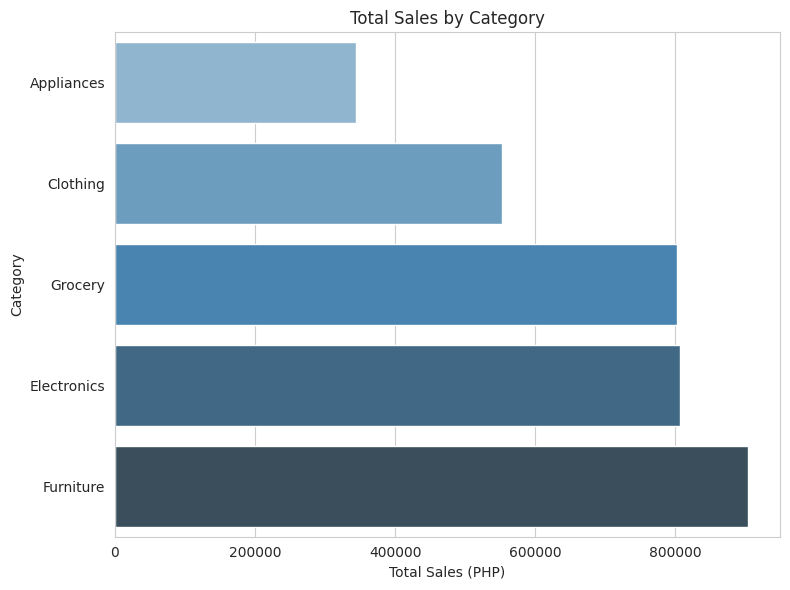

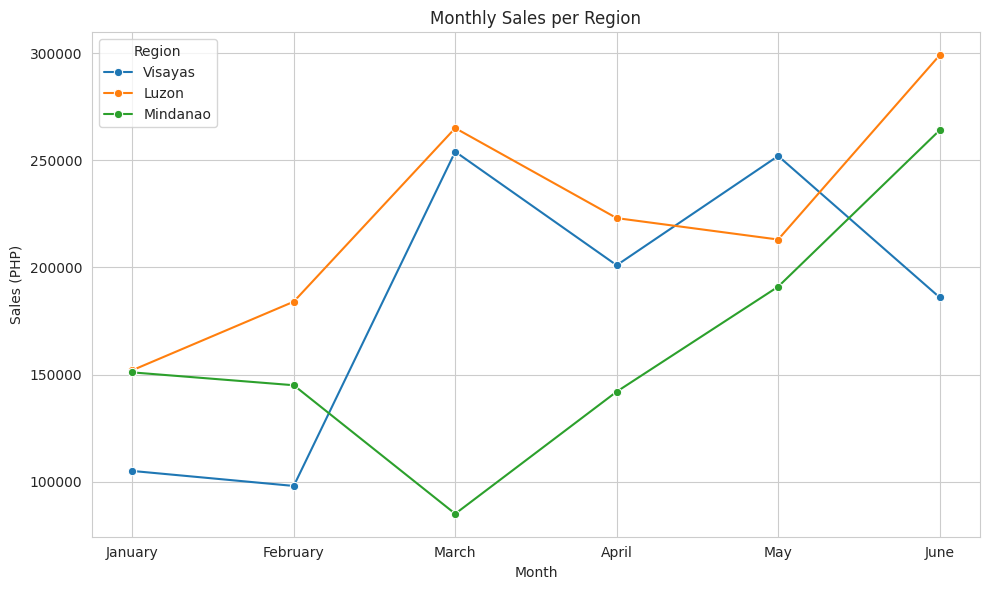

/tmp/ipython-input-11-4198527341.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Category', y='Sales (PHP)', palette='pastel')


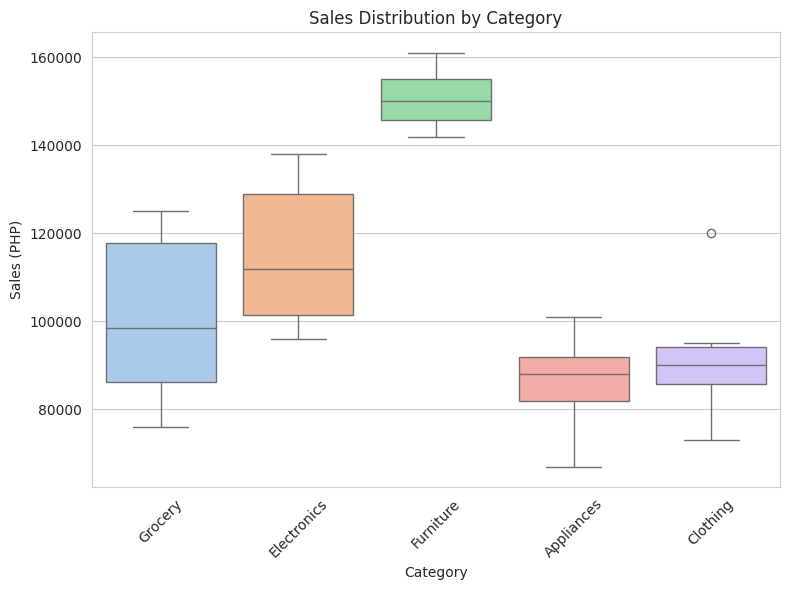

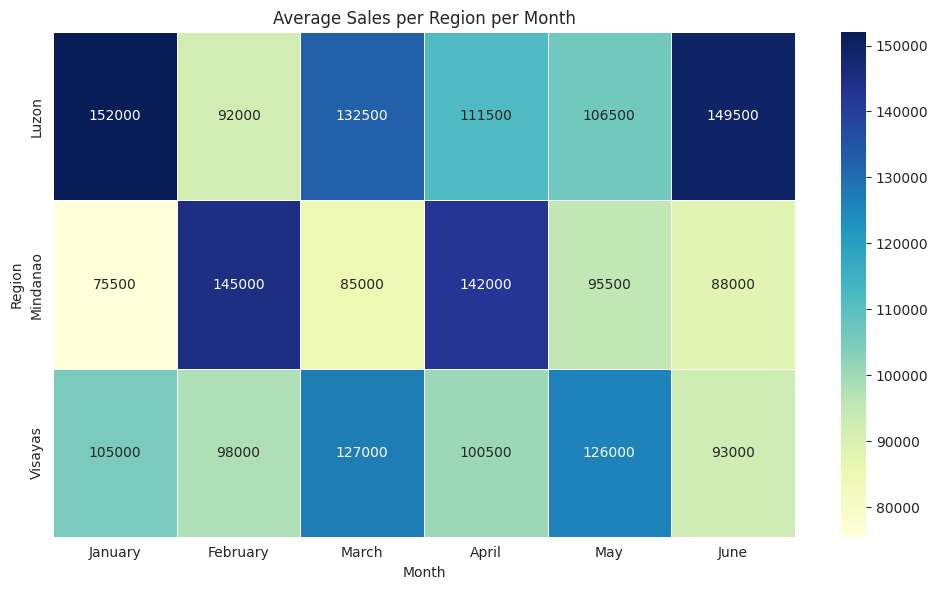

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import get_close_matches

# Set Seaborn style
sns.set_style("whitegrid")

# Read the CSV file
df = pd.read_csv('sales_data.csv')

# Print messy dataset
print("="*80)
print("MESSY DATASET:")
print("="*80)
print(df)
print("\nData Issues Summary:")
print("-"*40)
print(f"Total rows: {len(df)}")
print(f"Missing sales values: {df['Sales (PHP)'].isna().sum()}")
print("Category typos present:", set(df['Category']) - {'Grocery', 'Electronics', 'Clothing', 'Furniture', 'Appliances'})

# Define our standard categories
standard_categories = ['Grocery', 'Electronics', 'Clothing', 'Furniture', 'Appliances']

def correct_category(category, cutoff=0.6):
# Dynamically correct category names using fuzzy matching
    if pd.isna(category):
        return category

    # Exact match check
    if category in standard_categories:
        return category

    # Fuzzy match
    matches = get_close_matches(category, standard_categories, n=1, cutoff=cutoff)
    if matches:
        return matches[0]
    return category

# Apply the correction function
df['Category'] = df['Category'].apply(correct_category)

# Convert Sales to numeric, coercing errors to NaN
df['Sales (PHP)'] = pd.to_numeric(df['Sales (PHP)'], errors='coerce')

# Remove rows with missing sales values
df_clean = df.dropna(subset=['Sales (PHP)']).copy()

# Print cleaned dataset
print("\n" + "="*80)
print("CLEANED DATASET:")
print("="*80)
print(df_clean)
print("\nData Cleaning Summary:")
print("-"*40)
print(f"Rows removed due to missing sales: {len(df) - len(df_clean)}")
print(f"Final clean rows: {len(df_clean)}")
print("Corrected categories now standardized to:", df_clean['Category'].unique())

# ========================================================
# Bar chart: Total sales by category
# ========================================================
plt.figure(figsize=(8, 6))
category_sales = df_clean.groupby('Category')['Sales (PHP)'].sum().sort_values()
sns.barplot(x=category_sales.values, y=category_sales.index, palette="Blues_d")
plt.title('Total Sales by Category')
plt.xlabel('Total Sales (PHP)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# ========================================================
# Line chart: Sales over months for each region
# ========================================================
plt.figure(figsize=(10, 6))
monthly_region_sales = df_clean.groupby(['Month', 'Region'])['Sales (PHP)'].sum().reset_index()

# Ensure months are ordered
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_region_sales['Month'] = pd.Categorical(monthly_region_sales['Month'], categories=month_order, ordered=True)
monthly_region_sales.sort_values('Month', inplace=True)

sns.lineplot(data=monthly_region_sales, x='Month', y='Sales (PHP)', hue='Region', marker='o', palette='tab10')
plt.title('Monthly Sales per Region')
plt.xlabel('Month')
plt.ylabel('Sales (PHP)')

# Highlight the month with highest total sales
monthly_total = df_clean.groupby('Month')['Sales (PHP)'].sum()
max_month = monthly_total.idxmax()
max_value = monthly_total.max()
plt.annotate(f'Highest: {max_month} ({max_value:.0f} PHP)',
             xy=(max_month, max_value),
             xytext=(month_order.index(max_month), max_value + 1000),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')

plt.tight_layout()
plt.savefig('line_chart.png')
plt.show()

# ========================================================
# Box plot: Sales distribution by category
# ========================================================
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='Category', y='Sales (PHP)', palette='pastel')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales (PHP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========================================================
# Heatmap: Average sales per region per month
# ========================================================
heatmap_data = df_clean.groupby(['Region', 'Month'])['Sales (PHP)'].mean().unstack()
heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Average Sales per Region per Month')
plt.xlabel('Month')
plt.ylabel('Region')
plt.tight_layout()
plt.show()